In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
import pingouin as pg
from scipy.stats import pearsonr

C:\Users\MiguelW12\PycharmProjects\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [29]:
path = ('Results_cor_GSD1A_2023MS') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [52]:
df = pd.read_csv(r'GSD1A_corelation_data/COR_DATA.csv')

In [53]:
df

,CELL ID,Cell Type,COMPOUND,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX
0,75858,GSD1A,NONE,70.269305,0.685179,189.087247,211.179529,0.208687,1.680931,0.518292,0.157077,1.271293,1.376439
1,6894,GSD1A,NONE,67.590736,0.641599,215.886543,213.307073,0.177444,1.055838,0.578966,0.357722,1.669039,1.360983
2,361,GSD1A,NONE,79.378327,0.608207,172.677733,211.116166,0.181690,0.937716,0.461481,0.178113,1.634070,1.397154
3,38,HC,NONE,113.021700,0.543588,238.404262,209.210753,0.212083,2.402865,0.929156,0.405685,0.987729,1.927808
4,9503,HC,NONE,161.610361,0.502693,221.272547,215.059369,0.443918,1.957273,0.728441,0.470095,0.994130,1.908685
5,17507,HC,NONE,146.751826,0.553239,262.800486,214.701688,0.293438,1.842911,0.680511,0.436099,0.920648,2.125270


In [55]:
df["Sample"] = df["Cell Type"].astype(str) + df["CELL ID "].astype(str) + df["COMPOUND"].astype(str)
df.set_index(["Sample"], inplace = True,
                             append = True, drop = False)
df.fillna(0, inplace=True)
df

,,CELL ID,Cell Type,COMPOUND,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX,Sample
,Sample,,,,,,,,,,,,,,
0,GSD1A75858NONE,75858,GSD1A,NONE,70.269305,0.685179,189.087247,211.179529,0.208687,1.680931,0.518292,0.157077,1.271293,1.376439,GSD1A75858NONE
1,GSD1A6894NONE,6894,GSD1A,NONE,67.590736,0.641599,215.886543,213.307073,0.177444,1.055838,0.578966,0.357722,1.669039,1.360983,GSD1A6894NONE
2,GSD1A361NONE,361,GSD1A,NONE,79.378327,0.608207,172.677733,211.116166,0.181690,0.937716,0.461481,0.178113,1.634070,1.397154,GSD1A361NONE
3,HC38NONE,38,HC,NONE,113.021700,0.543588,238.404262,209.210753,0.212083,2.402865,0.929156,0.405685,0.987729,1.927808,HC38NONE
4,HC9503NONE,9503,HC,NONE,161.610361,0.502693,221.272547,215.059369,0.443918,1.957273,0.728441,0.470095,0.994130,1.908685,HC9503NONE
5,HC17507NONE,17507,HC,NONE,146.751826,0.553239,262.800486,214.701688,0.293438,1.842911,0.680511,0.436099,0.920648,2.125270,HC17507NONE


In [20]:
df.set_index(["Sample"], inplace = True,
                             append = True, drop = False)
df.fillna(0, inplace=True)
df

,,,CELL ID,Cell Type,COMPOUND,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX,Sample
,Sample,Sample,,,,,,,,,,,,,,
0,GSD1A75858NONE,GSD1A75858NONE,75858,GSD1A,NONE,70.269305,0.685179,189.087247,211.179529,0.208687,1.680931,0.518292,0.157077,1.271293,1.376439,GSD1A75858NONE
1,GSD1A6894NONE,GSD1A6894NONE,6894,GSD1A,NONE,67.590736,0.641599,215.886543,213.307073,0.177444,1.055838,0.578966,0.357722,1.669039,1.360983,GSD1A6894NONE
2,GSD1A361NONE,GSD1A361NONE,361,GSD1A,NONE,79.378327,0.608207,172.677733,211.116166,0.181690,0.937716,0.461481,0.178113,1.634070,1.397154,GSD1A361NONE
3,HC38NONE,HC38NONE,38,HC,NONE,115.871109,0.543588,227.528914,209.210753,0.212083,2.402865,0.929156,0.405685,0.987729,1.927808,HC38NONE
4,HC9503NONE,HC9503NONE,9503,HC,NONE,86.799831,0.502693,276.990177,223.121126,0.443918,1.957273,0.728441,0.470095,0.994130,1.908685,HC9503NONE
5,HC17507NONE,HC17507NONE,17507,HC,NONE,76.301695,0.553239,186.726369,224.078977,0.293438,1.842911,0.680511,0.306566,0.920648,2.125270,HC17507NONE


In [56]:
df2 = df.groupby(level=1).mean()
df2

C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17844\2134361720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(level=1).mean()


,CELL ID,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX
Sample,,,,,,,,,,,
GSD1A361NONE,361.0,79.378327,0.608207,172.677733,211.116166,0.181690,0.937716,0.461481,0.178113,1.634070,1.397154
GSD1A6894NONE,6894.0,67.590736,0.641599,215.886543,213.307073,0.177444,1.055838,0.578966,0.357722,1.669039,1.360983
GSD1A75858NONE,75858.0,70.269305,0.685179,189.087247,211.179529,0.208687,1.680931,0.518292,0.157077,1.271293,1.376439
HC17507NONE,17507.0,146.751826,0.553239,262.800486,214.701688,0.293438,1.842911,0.680511,0.436099,0.920648,2.125270
HC38NONE,38.0,113.021700,0.543588,238.404262,209.210753,0.212083,2.402865,0.929156,0.405685,0.987729,1.927808
HC9503NONE,9503.0,161.610361,0.502693,221.272547,215.059369,0.443918,1.957273,0.728441,0.470095,0.994130,1.908685


In [57]:
df_clean = df2.drop(columns=['CELL ID '])


In [58]:
df_normalbymean=(df_clean-df_clean.mean())/df_clean.std()
df_normalbymean

,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX
Sample,,,,,,,,,,
GSD1A361NONE,-0.665654,0.280881,-1.349438,-0.570335,-0.694600,-1.268617,-1.111852,-1.161287,1.152769,-0.834263
GSD1A6894NONE,-0.955632,0.771345,-0.024578,0.381392,-0.736035,-1.057123,-0.417010,0.175591,1.256684,-0.939935
GSD1A75858NONE,-0.889739,1.411451,-0.846293,-0.542810,-0.431181,0.062085,-0.775854,-1.317859,0.074712,-0.894780
HC17507NONE,0.991757,-0.526499,1.413888,0.987211,0.395773,0.352105,0.183559,0.758964,-0.967291,1.292859
HC38NONE,0.161985,-0.668250,0.665856,-1.398044,-0.398038,1.354684,1.654124,0.532585,-0.767947,0.715992
HC9503NONE,1.357282,-1.268929,0.140566,1.142587,1.864081,0.556866,0.467034,1.012006,-0.748927,0.660126


In [59]:
df_max_scaled = df_clean.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
df_max_scaled    

,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX
Sample,,,,,,,,,,
GSD1A361NONE,0.491171,0.887662,0.657068,0.981665,0.409287,0.390249,0.496667,0.378887,0.979049,0.657401
GSD1A6894NONE,0.418233,0.936397,0.821485,0.991852,0.399721,0.439408,0.623109,0.760958,1.000000,0.640381
GSD1A75858NONE,0.434807,1.000000,0.719509,0.981959,0.470102,0.699553,0.557809,0.334139,0.761692,0.647654
HC17507NONE,0.908060,0.807438,1.000000,0.998337,0.661017,0.766964,0.732397,0.927682,0.551604,1.000000
HC38NONE,0.699347,0.793353,0.907168,0.972805,0.477753,1.000000,1.000000,0.862984,0.591795,0.907088
HC9503NONE,1.000000,0.733667,0.841979,1.000000,1.000000,0.814558,0.783982,1.000000,0.595630,0.898091


In [60]:
df_min_max_scaled = df_clean.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())   
df_min_max_scaled    

,Lyso intensity,Lyso Area,Mito intensity,Nuc area,Sirt-1,FLUX,PGC1A,TFEB,p62,COX
Sample,,,,,,,,,,
GSD1A361NONE,0.125374,0.578206,0.000000,0.325789,0.015936,0.000000,0.000000,0.067202,0.953275,0.047327
GSD1A6894NONE,0.000000,0.761188,0.479444,0.700391,0.000000,0.080621,0.251210,0.641003,1.000000,0.000000
GSD1A75858NONE,0.028489,1.000000,0.182080,0.336623,0.117246,0.507262,0.121475,0.000000,0.468532,0.020223
HC17507NONE,0.841963,0.276987,1.000000,0.938843,0.435291,0.617818,0.468338,0.891392,0.000000,1.000000
HC38NONE,0.483207,0.224102,0.729300,0.000000,0.129993,1.000000,1.000000,0.794228,0.089634,0.741639
HC9503NONE,1.000000,0.000000,0.539207,1.000000,1.000000,0.695873,0.570824,1.000000,0.098186,0.716618


In [61]:
corleation_list_all = [(df_normalbymean), (df_max_scaled), (df_min_max_scaled)]


In [62]:
# define cor function
def cor_function(list):
      for  x in list:
        cor = x.corr(method = 'pearson').round(2)
        sns.heatmap(cor, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
        sns.set_style("dark")
        cax = plt.gcf().axes[0]
        cax.tick_params(labelsize=10)
        plt.yticks(rotation="horizontal", fontsize=6)
        plt.xticks(rotation="vertical", fontsize=6)
        plt.margins(0.2)
        plt.subplots_adjust(bottom=0.4)
        name = [i for i in globals() if globals()[i] is x][0]
        plt.savefig(path + '\\' + '{}pearsonheatmap2_full-tryP.pdf'.format(name))
        plt.close()
        cor = cor.unstack()
        cor = abs(cor)
        writer = pd.ExcelWriter(path + '//' + '{}PCORDATA-excel.xlsx'.format(name), engine='xlsxwriter')
        cor.to_excel(writer)
        writer.save()
        print('done:)')
        rho = x.corr()
        pval = x.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
        p = pval.applymap(lambda x: ''.join(['*' for t in [0.0001,0.001,0.01,0.1,] if x<=t]))
        try_1 = rho.round(2).astype(str) + p
        try_1.to_html(path + '\\' + '{}try1.html'.format(name))
        print('done:)2')
# cor_function(chan_3)
cor_function(corleation_list_all)


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17844\3316212783.py:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


done:)
done:)2


C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17844\3316212783.py:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
C:\Users\MiguelW12\AppData\Local\Temp\ipykernel_17844\3316212783.py:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


done:)
done:)2
done:)
done:)2


In [63]:
def bubble_plot(list):
    for x in list:
        kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'viridis',
    },
    'figure': {
        'figsize': (12,8),
    },
    }
        name = [i for i in globals() if globals()[i] is x][0]
        plot_correlation_heatmap(x, bubble=True, annotate=True,textcolors=['white', 'black'],
                                 val_fmt='{x:.2f}',  **kwargs)
        plt.style.use("classic")
        cax = plt.gcf().axes[0]
#         cax.tick_params(labelsize=3)
#         plt.yticks(rotation="horizontal", fontsize=6)
#         plt.xticks(rotation="horizontal", fontsize=6)
        font = {'family' : 'Arial',
        'size'   : 10}

        plt.rc('font', **font)
# plt.margins(0.1)
# plt.subplots_adjust(bottom=0.3)
        plt.savefig(path + '\\' + '{}bubblescatmatrixv2.pdf'.format(name), dpi=600)
        plt.show()
        print('done:)')
#marker=x.columns,

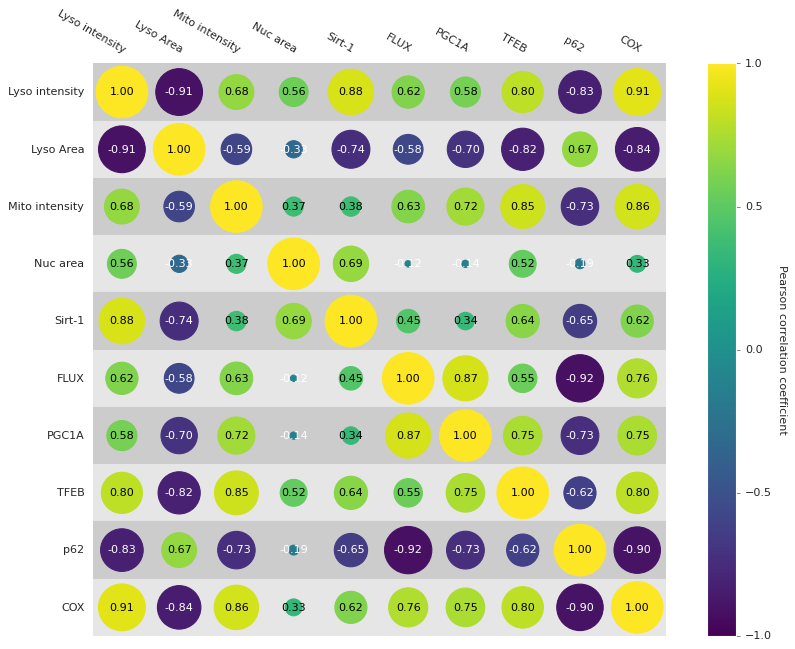

done:)


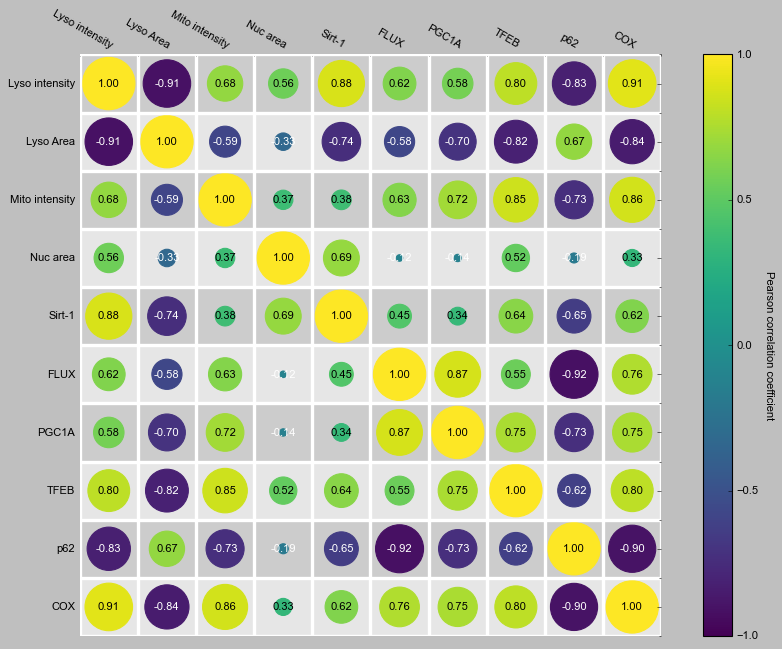

done:)


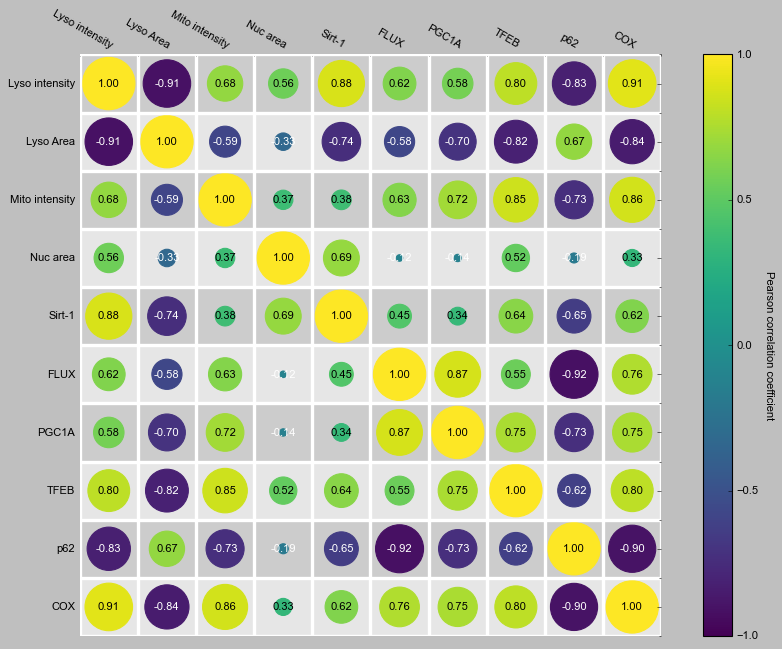

done:)


In [64]:
bubble_plot(corleation_list_all)